In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling Sub-halo Alignment 2-point Correlations

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0.0, dz_tol=0.001, version_name='halotools_v0p4')
for name in halocat.halo_table.dtype.names:
    print(name)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


halo_vmax_firstacc
halo_dmvir_dt_tdyn
halo_macc
halo_scale_factor
halo_vmax_mpeak
halo_m_pe_behroozi
halo_xoff
halo_spin
halo_scale_factor_firstacc
halo_c_to_a
halo_mvir_firstacc
halo_scale_factor_last_mm
halo_scale_factor_mpeak
halo_pid
halo_m500c
halo_id
halo_halfmass_scale_factor
halo_upid
halo_t_by_u
halo_rvir
halo_vpeak
halo_dmvir_dt_100myr
halo_mpeak
halo_m_pe_diemer
halo_jx
halo_jy
halo_jz
halo_m2500c
halo_mvir
halo_voff
halo_axisA_z
halo_axisA_x
halo_axisA_y
halo_y
halo_b_to_a
halo_x
halo_z
halo_m200b
halo_vacc
halo_scale_factor_lastacc
halo_vmax
halo_m200c
halo_vx
halo_vy
halo_vz
halo_dmvir_dt_inst
halo_rs
halo_nfw_conc
halo_hostid
halo_mvir_host_halo


## Alignment Models

In [3]:
from intrinsic_alignments.ia_models.ia_model_components import CentralAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import MajorAxisSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import HybridSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignmentStrength

In [4]:
# create a model table
from intrinsic_alignments.ia_models.utils import halocat_to_galaxy_table
table = halocat_to_galaxy_table(halocat)

In [5]:
# apply central alignments to model
cen_alignment_model = CentralAlignment(central_alignment_strength=0.99)
table = cen_alignment_model.assign_central_orientation(table=table)

/Users/duncan/Projects/intrinsic_alignments/ia_models/ia_model_components.py:111: UserWarning: `central_alignment_strength` not detected in the table, using value in self.param_dict.
  warn(msg)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in gr

In [6]:
# apply satellite alignments to model
sat_alignment_strength = RadialSatelliteAlignmentStrength(satellite_alignment_a=2.0, satellite_alignment_gamma=0.15)
sat_alignment_model = RadialSatelliteAlignment(Lbox=halocat.Lbox, satellite_alignment_strength=0.85)
#table = sat_alignment_strength.assign_satellite_alignment_strength(table=table, Lbox=halocat.Lbox)
table = sat_alignment_model.assign_satellite_orientation(table=table)

"""
r_sample = np.logspace(-2,0,100)
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(r_sample, sat_alignment_strength.alignment_strength_radial_dependence(r_sample), '-', color='black')
plt.ylim([0,1])
plt.xlim([0.09,1.01])
plt.xscale('log')
plt.ylabel('alignment strength')
plt.xlabel(r'$r/r_{\rm vir}$')
plt.show()

filename = "radial_subhalo_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)
"""

/Users/duncan/Projects/intrinsic_alignments/ia_models/ia_model_components.py:345: UserWarning: 1033105 galaxies have a radial distance equal to zero (or infinity) from their host. These galaxies will be re-assigned random alignment vectors.
  warn(msg)
/Users/duncan/Projects/intrinsic_alignments/ia_models/ia_model_components.py:353: UserWarning: `satellite_alignment_strength` not detected in the table, using value in self.param_dict.
  warn(msg)


'\nr_sample = np.logspace(-2,0,100)\nfig, ax = plt.subplots(figsize=(3.3,3.3))\nfig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)\nplt.plot(r_sample, sat_alignment_strength.alignment_strength_radial_dependence(r_sample), \'-\', color=\'black\')\nplt.ylim([0,1])\nplt.xlim([0.09,1.01])\nplt.xscale(\'log\')\nplt.ylabel(\'alignment strength\')\nplt.xlabel(r\'$r/r_{\rm vir}$\')\nplt.show()\n\nfilename = "radial_subhalo_alignment_strength.pdf"\nfig.savefig(\'/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/\'+filename, dpi=250)\n'

## Alignment Correlation Functions

In [7]:
from halotools.mock_observables.alignments import ed_3d, ee_3d
from halotools.mock_observables.alignments import ee_3d_one_two_halo_decomp, ed_3d_one_two_halo_decomp

rbins = np.logspace(-1,1.4,20)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

In [8]:
# galaxy coordinates and orientations
galaxy_coords = np.vstack((table['x'],
                           table['y'],
                           table['z'])).T

galaxy_orientations = np.vstack((table['galaxy_axisA_x'],
                                 table['galaxy_axisA_y'],
                                 table['galaxy_axisA_z'])).T

cens = table['gal_type']=='centrals'
sats = table['gal_type']=='satellites'
gal_mask = table['halo_mpeak']>10**12.0

# halo orientations
halo_coords = np.vstack((halocat.halo_table['halo_x'],
                         halocat.halo_table['halo_y'],
                         halocat.halo_table['halo_z'])).T

halo_orientations = np.vstack((halocat.halo_table['halo_axisA_x'],
                               halocat.halo_table['halo_axisA_y'],
                               halocat.halo_table['halo_axisA_z'])).T

hosts = halocat.halo_table['halo_upid']==-1
subs = halocat.halo_table['halo_upid']!=-1
halo_mask = halocat.halo_table['halo_mpeak']>10**12.0

In [18]:
galaxy_omega = ed_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                   galaxy_coords[gal_mask],
                   rbins, period=halocat.Lbox, num_threads=1)
galaxy_eta = ee_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     rbins, period=halocat.Lbox, num_threads=1)

In [19]:
halo_omega = ed_3d(halo_coords[halo_mask], halo_orientations[halo_mask], halo_coords[halo_mask],
                 rbins, period=halocat.Lbox, num_threads=4)
halo_eta = ee_3d(halo_coords[halo_mask], halo_orientations[halo_mask],
                   halo_coords[halo_mask], halo_orientations[halo_mask],
                   rbins, period=halocat.Lbox, num_threads=4)

## 1- and 2-halo decomposition

In [14]:
host_ids = table['halo_hostid']

galaxy_omega_1h, galaxy_omega_2h  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins, period=halocat.Lbox, num_threads=4)
galaxy_eta_1h, galaxy_eta_2h = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins, period=halocat.Lbox, num_threads=4)

In [15]:
galaxy_omega_1h, galaxy_omega_2h  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins, period=halocat.Lbox, num_threads=4)
galaxy_eta_1h, galaxy_eta_2h = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins, period=halocat.Lbox, num_threads=4)

In [16]:
host_ids = halocat.halo_table['halo_hostid']
halo_omega_1h, halo_omega_2h = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                     host_ids[halo_mask],
                                                     halo_coords[halo_mask], host_ids[halo_mask],
                                                     rbins, period=halocat.Lbox, num_threads=4)
halo_eta_1h, halo_eta_2h= ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        rbins, period=halocat.Lbox, num_threads=4)

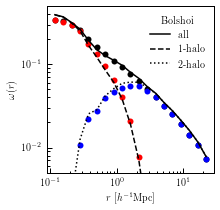

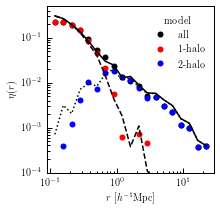

In [20]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='black', mec='none')
p1, = plt.plot(rbin_centers, galaxy_omega_1h, 'o', color='red', mec='none')
p1, = plt.plot(rbin_centers, galaxy_omega_2h, 'o', color='blue', mec='none')
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
l2, = plt.plot(rbin_centers, halo_omega_1h, '--', color='black')
l3, = plt.plot(rbin_centers, halo_omega_2h, ':', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.005,0.5])
plt.legend([l1,l2,l3],['all', '1-halo', '2-halo'], frameon=False, loc='upper right', fontsize=10, title='Bolshoi')
plt.show()

filename = "subhalo_ed_tpcf.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='black', mec='none')
p2, = plt.plot(rbin_centers, galaxy_eta_1h, 'o', color='red', mec='none')
p3, = plt.plot(rbin_centers, galaxy_eta_2h, 'o', color='blue', mec='none')
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
l2, = plt.plot(rbin_centers, halo_eta_1h, '--', color='black')
l3, = plt.plot(rbin_centers, halo_eta_2h, ':', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.0001,0.5])
plt.legend([p1,p2,p3],['all', '1-halo', '2-halo'], frameon=False, loc='upper right', fontsize=10, title='model')
plt.show()

filename = "subhalo_ee_tpcf.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

## further decomposition

In [15]:
# (sub-)haloes

centrals = (halocat.halo_table['halo_upid'][halo_mask]==-1)
satellites = (halocat.halo_table['halo_upid'][halo_mask]!=-1)

host_ids = halocat.halo_table['halo_hostid']

In [16]:
# EE
halo_omega_1h_ss, halo_omega_2h_ss = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = satellites,  
                                                        mask2 = satellites,
                                                        period=halocat.Lbox, num_threads=4)

In [17]:
halo_omega_1h_cs, halo_omega_2h_cs = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = centrals,  
                                                        mask2 = satellites,
                                                        period=halocat.Lbox, num_threads=4)

In [18]:
halo_omega_1h_sc, halo_omega_2h_sc = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = satellites,  
                                                        mask2 = centrals,
                                                        period=halocat.Lbox, num_threads=4)

In [19]:
halo_omega_1h_cc, halo_omega_2h_cc = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = centrals,  
                                                        mask2 = centrals,
                                                        period=halocat.Lbox, num_threads=4)

In [20]:
## ED
halo_eta_1h_ss, halo_eta_2h_ss = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = satellites,  
                                    mask2 = satellites,
                                    period=halocat.Lbox, num_threads=4)

In [21]:
halo_eta_1h_cs, halo_eta_2h_cs = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = centrals,  
                                    mask2 = satellites,
                                    period=halocat.Lbox, num_threads=4)

In [22]:
halo_eta_1h_sc, halo_eta_2h_sc = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = satellites,  
                                    mask2 = centrals,
                                    period=halocat.Lbox, num_threads=4)

In [23]:
halo_eta_1h_cc, halo_eta_2h_cc = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = centrals,  
                                    mask2 = centrals,
                                    period=halocat.Lbox, num_threads=4)

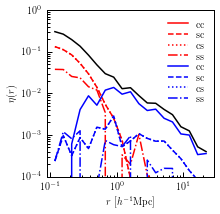

In [47]:
## plot EE results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
#l2, = plt.plot(rbin_centers, halo_omega_1h, '-', color='red')
#l3, = plt.plot(rbin_centers, halo_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_omega_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.0001,1])
plt.legend([l4,l5,l6, l7, l8, l9, l10, l11],['cc', 'sc', 'cs', 'ss', 'cc', 'sc', 'cs', 'ss'],
           frameon=False, loc='upper right', fontsize=10, labelspacing=0.1)
plt.show()

fig.savefig('/Users/duncan/Desktop/ee_components.pdf', dpi=250)

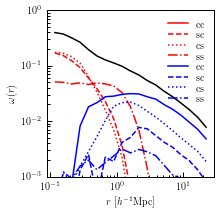

In [48]:
# plot ED results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
#l2, = plt.plot(rbin_centers, halo_eta_1h, '-', color='red')
#l3, = plt.plot(rbin_centers, halo_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_eta_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.001,1])
plt.legend([l4,l5,l6, l7, l8, l9, l10, l11],['cc', 'sc', 'cs', 'ss', 'cc', 'sc', 'cs', 'ss'],
           frameon=False, loc='upper right', fontsize=10, labelspacing=0.1)
plt.show()

fig.savefig('/Users/duncan/Desktop/ed_components.pdf', dpi=250)

In [131]:
# galaxies

host_ids = table['halo_hostid']
satellites = table['gal_type'][gal_mask]=='satellites'
centrals = table['gal_type'][gal_mask]=='centrals'

In [132]:
# EE
galaxy_omega_1h_cc, galaxy_omega_2h_cc = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = centrals, mask2 = centrals,
                                                             period=halocat.Lbox, num_threads=4)

In [133]:
galaxy_omega_1h_sc, galaxy_omega_2h_sc = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = satellites, mask2 = centrals,
                                                             period=halocat.Lbox, num_threads=4)

In [134]:
galaxy_omega_1h_cs, galaxy_omega_2h_cs = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = centrals, mask2 = satellites,
                                                             period=halocat.Lbox, num_threads=4)

In [135]:
galaxy_omega_1h_ss, galaxy_omega_2h_ss = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = satellites, mask2 = satellites,
                                                             period=halocat.Lbox, num_threads=4)

In [136]:
# ED
galaxy_eta_1h_cc, galaxy_eta_2h_cc  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = centrals, mask2 = centrals,
                                                          period=halocat.Lbox, num_threads=4)

In [137]:
galaxy_eta_1h_sc, galaxy_eta_2h_sc  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = satellites, mask2 = centrals,
                                                          period=halocat.Lbox, num_threads=4)

In [138]:
galaxy_eta_1h_cs, galaxy_eta_2h_cs  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = centrals, mask2 = satellites,
                                                          period=halocat.Lbox, num_threads=4)

In [139]:
galaxy_eta_1h_ss, galaxy_eta_2h_ss  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = satellites, mask2 = satellites,
                                                          period=halocat.Lbox, num_threads=4)

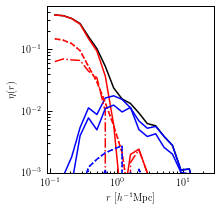

In [140]:
# plot EE results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, galaxy_omega, '-', color='black')
l2, = plt.plot(rbin_centers, galaxy_omega_1h, '-', color='red')
l3, = plt.plot(rbin_centers, galaxy_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, galaxy_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, galaxy_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, galaxy_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, galaxy_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, galaxy_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, galaxy_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, galaxy_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, galaxy_omega_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.001,0.5])
plt.show()

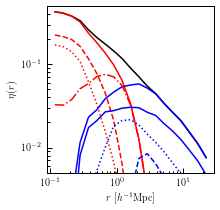

In [141]:
#plot ED results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, galaxy_eta, '-', color='black')
l2, = plt.plot(rbin_centers, galaxy_eta_1h, '-', color='red')
l3, = plt.plot(rbin_centers, galaxy_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, galaxy_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, galaxy_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, galaxy_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, galaxy_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, galaxy_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, galaxy_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, galaxy_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, galaxy_eta_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.005,0.5])
plt.show()

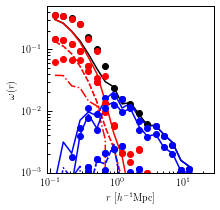

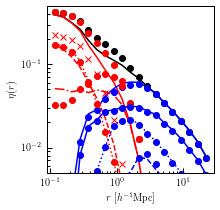

In [142]:
# all together now

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
l2, = plt.plot(rbin_centers, halo_omega_1h, '-', color='red')
l3, = plt.plot(rbin_centers, halo_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_omega_2h_ss, '-.', color='blue')
l1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='black')
l2, = plt.plot(rbin_centers, galaxy_omega_1h, 'o', color='red')
l3, = plt.plot(rbin_centers, galaxy_omega_2h, 'o', color='blue')
l4, = plt.plot(rbin_centers, galaxy_omega_1h_cc, 'o', color='red')
l5, = plt.plot(rbin_centers, galaxy_omega_1h_sc, 'o', color='red')
l6, = plt.plot(rbin_centers, galaxy_omega_1h_cs, 'o', color='red')
l7, = plt.plot(rbin_centers, galaxy_omega_1h_ss, 'o', color='red')
l8, = plt.plot(rbin_centers, galaxy_omega_2h_cc, 'o', color='blue')
l9, = plt.plot(rbin_centers, galaxy_omega_2h_sc, 'o', color='blue')
l10, = plt.plot(rbin_centers, galaxy_omega_2h_cs, 'o', color='blue')
l11, = plt.plot(rbin_centers, galaxy_omega_2h_ss, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.001,0.5])
plt.show()

filename = "total_decomp_ee.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
l2, = plt.plot(rbin_centers, halo_eta_1h, '-', color='red')
l3, = plt.plot(rbin_centers, halo_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_eta_2h_ss, '-.', color='blue')
l1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='black')
l2, = plt.plot(rbin_centers, galaxy_eta_1h, 'o', color='red')
l3, = plt.plot(rbin_centers, galaxy_eta_2h, 'o', color='blue')
l4, = plt.plot(rbin_centers, galaxy_eta_1h_cc, 'o', color='red')
l5, = plt.plot(rbin_centers, galaxy_eta_1h_sc, 'x', color='red')
l6, = plt.plot(rbin_centers, galaxy_eta_1h_cs, 'o', color='red')
l7, = plt.plot(rbin_centers, galaxy_eta_1h_ss, 'o', color='red')
l8, = plt.plot(rbin_centers, galaxy_eta_2h_cc, 'o', color='blue')
l9, = plt.plot(rbin_centers, galaxy_eta_2h_sc, 'o', color='blue')
l10, = plt.plot(rbin_centers, galaxy_eta_2h_cs, 'o', color='blue')
l11, = plt.plot(rbin_centers, galaxy_eta_2h_ss, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.005,0.5])
plt.show()

filename = "total_decomp_ed.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

In [143]:
from halotools.mock_observables import tpcf

In [144]:
xi_sub = tpcf(halo_coords[halo_mask], rbins, period=halocat.Lbox)
xi_gal = tpcf(galaxy_coords[gal_mask], rbins, period=halocat.Lbox)

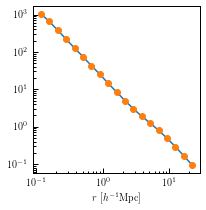

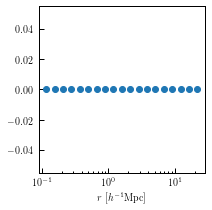

In [145]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(rbin_centers,xi_sub)
plt.plot(rbin_centers,xi_gal, 'o')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.xscale('log')
plt.yscale('log')

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(rbin_centers,(xi_gal-xi_sub)/xi_sub, 'o')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.xscale('log')

In [16]:
galaxy_eta

array([-0.23394672, -0.22468342, -0.20682348, -0.18531644, -0.14217271,
       -0.11294516, -0.09511314, -0.07998843, -0.06138516, -0.04514086,
       -0.03799208, -0.0300673 , -0.0235524 , -0.01628407, -0.01233829,
       -0.01165289, -0.00802347, -0.00548551, -0.00380639])

In [29]:
table

halo_id,halo_upid,halo_hostid,x,y,z,vx,vy,vz,halo_mpeak,galaxy_axisA_x,galaxy_axisA_y,galaxy_axisA_z,galaxy_axisB_x,galaxy_axisB_y,galaxy_axisB_z,galaxy_axisC_x,galaxy_axisC_y,galaxy_axisC_z,gal_type,halo_x,halo_y,halo_z,halo_mvir,halo_rvir,halo_axisA_x,halo_axisA_y,halo_axisA_z
int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,unicode10,float64,float64,float64,float64,float64,float64,float64,float64
3060299107,-1,3060299107,35.72499,43.2765,17.71299,48.16,-34.49,-82.51,164300000000000.0,0.4434837854130266,0.4314853008826601,-0.7855842203086394,0.29723942615345167,0.7560845201814553,0.5830822599616159,0.8455594926530596,-0.4920941306947066,0.20705678187425236,centrals,35.72499084472656,43.2765007019043,17.712989807128906,164299997708288.0,1.1335829496383667,51.394100189208984,-20.201900482177734,17.917400360107422
3060312953,-1,3060312953,45.20892,49.70751,39.91124,-14.21,264.96,-132.11,158900000000000.0,-0.06831572926239124,0.9861133453517871,0.15137183111284225,0.7985738817386384,-0.03689608519696859,0.6007648743909892,0.5980072880327051,0.16192328126691735,-0.784963779064693,centrals,45.208919525146484,49.70751190185547,39.91123962402344,158899999080448.0,1.1208980083465576,47.96049880981445,-3.0215799808502197,41.329200744628906
3058440575,-1,3058440575,21.81201,13.89226,9.54759,-4.75,104.38,-61.29,114400000000000.0,0.09776241203400704,-0.6759815049532867,0.7304050354114371,0.36855070750721386,0.7063315882091695,0.6043724542811693,-0.9244527498954315,0.210106383670277,0.3181861416714645,centrals,21.812009811401367,13.89225959777832,9.547590255737305,114400002310144.0,1.0046019554138184,40.11330032348633,18.34429931640625,11.608400344848633
3058441456,-1,3058441456,26.18034,14.31423,6.51834,-271.94,78.85,423.44,97090000000000.0,0.06564037878836587,-0.9674343639677179,0.24446286443322424,0.31604230206272826,0.25253481756695706,0.9145181404561175,-0.9464716604206441,0.017231289295953314,0.32232666456529485,centrals,26.180339813232422,14.314229965209961,6.518340110778809,97090000650240.0,0.9511829614639282,49.16559982299805,-6.977029800415039,-40.812198638916016
3058452345,-1,3058452345,1.74397,29.73324,17.82519,317.08,238.52,179.34,85270000000000.0,-0.19148823929604603,-0.2998515517069835,-0.9345701156950261,0.19845626867307992,0.9206939776699864,-0.3360620610937463,0.96122180771956,-0.2498232303472452,-0.11679464860689776,centrals,1.7439700365066528,29.733240127563477,17.8251895904541,85269998993408.0,0.9108850359916687,37.9640998840332,-19.65489959716797,-1.4724700450897217
3058463669,-1,3058463669,10.27388,26.23833,22.29268,-57.3,186.67,-187.27,84390000000000.0,-0.591292934494965,0.25139514916740247,0.7662722392149102,0.7769513742409436,0.4322434454303735,0.45772498942879325,-0.21614631082080102,0.8660058214917375,-0.4509043018878602,centrals,10.273880004882812,26.238330841064453,22.292680740356445,84260002201600.0,0.9072589874267578,44.04970169067383,15.064499855041504,29.048599243164062
3058683023,-1,3058683023,12.02348,36.63193,33.6698,-306.38,-77.55,-386.58,83570000000000.0,0.8146086946479101,-0.39957084104442375,0.4204233789777629,0.3054546142933474,0.9117326147136136,0.27466546538358255,-0.4930620176113044,-0.09532461515542252,0.8647560722738756,centrals,12.023480415344238,36.63193130493164,33.6697998046875,83569997250560.0,0.9048089981079102,16.772600173950195,38.74549865722656,4.325319766998291
3060115960,-1,3060115960,45.82376,6.50973,41.8451,-233.79,179.51,64.62,77950000000000.0,0.10283087652106004,-0.9823919744070062,-0.15598660024058036,0.9578800622092913,0.055528353037102636,0.2817488037790242,-0.2681260846240714,-0.1783889307936202,0.9467237147734677,centrals,45.823760986328125,6.509729862213135,41.84510040283203,77949998989312.0,0.8840529918670654,25.44219970703125,-2.93612003326416,35.26369857788086
3058477222,-1,3058477222,14.5065,24.59419,38.47238,-31.82,239.24,-397.53,72840000000000.0,0.973700785114451,-0.0742

In [31]:
galaxy_orientations

array([[ 0.44348379,  0.4314853 , -0.78558422],
       [-0.06831573,  0.98611335,  0.15137183],
       [ 0.09776241, -0.6759815 ,  0.73040504],
       ...,
       [-0.00665187, -0.30895126, -0.95105461],
       [-0.27890489,  0.1617772 ,  0.946594  ],
       [ 0.03093475, -0.99919494, -0.02554422]])

In [21]:
galaxy_orientations

array([[ 0.3717108 ,  0.92813882, -0.01973357],
       [-0.53819161,  0.52084495,  0.66262382],
       [-0.3160598 ,  0.8933171 , -0.31951644],
       ...,
       [-0.4664468 ,  0.8534754 , -0.23239435],
       [ 0.18268852, -0.02237276,  0.98291626],
       [ 0.27207897, -0.76333676, -0.58590957]])